# Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# For randomized data splitting
from sklearn.model_selection import train_test_split

## 1. Logistic Regression
from sklearn.linear_model import LogisticRegression

## 2. Linear Discriminat Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
from sklearn import metrics

# calculate accuracy measures and confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

# Problem 1

# Load Dataset

In [ ]:
df = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes')

1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.
4

In [ ]:
df.head()

In [ ]:
df.tail()

The 'Unnamed: 0' can be dropped. The 'vote', 'gender' need to be converted to categorical based on the data dictionary provided.

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df.describe().T

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
# Filter the DataFrame to show only the duplicate rows
duplicate_data = df[df.duplicated()]
duplicate_data.head(10)

In [ ]:
# Remove duplicates and update the DataFrame
df = df.drop_duplicates(inplace=True)

There are no null values in the dataset provided.

In [ ]:
for i in df.columns:
    if df[i].dtype == 'int64':
        all_integers = (df[i] % 1 == 0).all()
        if all_integers:
            print(f'{i} observations are integers.')
        else:
            print(f'{i} may contain non-integers observations.')


All the observations in the int64 type are truly int64

In [ ]:
value_counts = df['age'].value_counts()
plt.figure()
plt.bar(value_counts.index, value_counts.values)
# Set the x-axis limits
plt.xlim(left=20)

plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Bar Chart of age')

In [ ]:
# Plotting histogram for each column
plt.figure()
for i in df.columns:
    if df[i].dtype=='int64':
        df[i].plot(kind='hist', density=True)
        df[i].plot(kind='kde', title=f"{i} (Histogram and Density)")
        plt.xlabel(i)
        plt.show()

1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.
7

In [ ]:
df.info()

In [ ]:
# Create the bar plot
sns.countplot(data=df, x='gender', hue='vote')
# Set the labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Plot of Gender vs Vote')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df[['vote','gender']].value_counts()

Quick bivariate analysis on Vote & Gender suggests that majority of votes are with Labour party. Within the party votes, there is no major parity on how either gender votes on a party

In [ ]:
## We are coding up the 'gender' variable in #female as 1, male 0
df['gender']=np.where(df['gender'] =='female', '1', df['gender'])
df['gender']=np.where(df['gender'] =='male', '0', df['gender'])
df['gender'] = df['gender'].astype('int64')

In [ ]:
sns.pairplot(df, hue='vote', diag_kind='kde');
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.
4

In [ ]:
df['vote'].value_counts()

In [ ]:
## We are coding up the 'vote' variable in #Labour as 1, Conservative 0
df['vote']=np.where(df['vote'] =='Labour', '1', df['vote'])
df['vote']=np.where(df['vote'] =='Conservative', '0', df['vote'])

In [ ]:
df['vote'] = df['vote'].astype('int64')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe().T

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

Scaling is not needed for the categorical variables.  Scaling is beneficial on the 'age' variable as the observations,min, max are higher in magnitude compared to corresponding values in other features. StandardScaler can be used for just 'age' variable.

Alternately, 'age' can be binned with labels from 0,1,2,3 & no scaling will be required on any of the variables.

In [ ]:
plt.figure(figsize = (12,8))
feature_list = df.columns

for i in range(len(feature_list)):
        plt.subplot(3,4, i + 1)
        sns.boxplot(y = df[feature_list[i]], data = df)
        plt.title(feature_list[i])
        plt.tight_layout()

1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)
4

In [ ]:
def conf_mat(y_test, y_predict):
    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_test, y_predict)
    plt.figure(figsize=(6, 4))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Contraception Yes', 'Contraception No']
    plt.title('Confusion Matrix - Test Data for {} Model'.format(model))
    plt.ylabel('Actual (True) label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    plt.xticks(rotation=45)
    s = [['TN', 'FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]))
    plt.show()

In [ ]:
# define empty lists to contain the performance metrics:

model_names = []
accuracy_train = []
accuracy_test = []
confusion_train = []
confusion_test = []
report_train = []
report_test = []
roc_auc_train = []
roc_auc_test =[]

In [ ]:
X= df.drop(['vote'], axis=1)
y= df['vote']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= .3, random_state= 1, stratify=y)

In [ ]:
# Define the models
models = [('Logistic Regression', LogisticRegression(max_iter=1000)),
          ('LDA', LinearDiscriminantAnalysis(n_components=1))]

In [ ]:
# loop through the models
for name, model in models:

    # fit the model on the training data
    model.fit(X_train, y_train)

    # predict the training and test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # calculate the performance metrics

    accuracy_train_score = accuracy_score(y_train, y_pred_train)
    accuracy_test_score = accuracy_score(y_test, y_pred_test)
    confusion_train_score = confusion_matrix(y_train, y_pred_train)
    confusion_test_score = confusion_matrix(y_test, y_pred_test)
    report_train_score = classification_report(y_train, y_pred_train)
    report_test_score = classification_report(y_test, y_pred_test)

    # Get the predicted probabilities for train and test data
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the roc_auc_score for train and test data
    train_roc_auc_score = roc_auc_score(y_train, y_train_proba)
    test_roc_auc_score = roc_auc_score(y_test, y_test_proba)

    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)
    
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot ROC curves
    plt.plot(train_fpr, train_tpr, label='Train ROC Curve (area = %0.2f)' % train_roc_auc_score)
    plt.plot(test_fpr, test_tpr, label='Test ROC Curve (area = %0.2f)' % test_roc_auc_score)


    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for {} Model".format(model))
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot Confusion Matrix
    conf_mat(y_test, y_pred_test)
    
    # Print the confusion matrix and classification report for train data
    print('Model: ', name)
    print('Confusion Matrix for Train Data:')
    print(confusion_matrix(y_train, y_pred_train))
    print('Classification Report for Train Data:')
    print(classification_report(y_train, y_pred_train))
    print('-----------------------')
    
    # Print the confusion matrix and classification report for test data
    print('Model: ', name)
    print('Confusion Matrix for Test Data:')
    print(confusion_matrix(y_test, y_pred_test))
    print('Classification Report for Test Data:')
    print(classification_report(y_test, y_pred_test))
    print('-----------------------')

    # append the results to the respective lists
    model_names.append(name)
    accuracy_train.append(accuracy_train_score)
    accuracy_test.append(accuracy_test_score)
    confusion_train.append(confusion_train_score)
    confusion_test.append(confusion_test_score)
    report_train.append(report_train_score)
    report_test.append(report_test_score)
    roc_auc_train.append(train_roc_auc_score)
    roc_auc_test.append(test_roc_auc_score)

In [ ]:
# create a dataframe to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy (train)': accuracy_train,
    'Accuracy (test)': accuracy_test,
    'ROC AUC (train)': roc_auc_train,
    'ROC AUC (test)': roc_auc_test
})

In [ ]:
results_df

Based on these results & classification reports, both models have similar performance in terms of accuracy, precision, and F1-score. However, the Logistic Regression model achieves slightly higher accuracy and F1-scores on both train and test data compared to LDA.

Therefore, based on the provided information, the Logistic Regression model may be considered a slightly better model for this particular classification task.

1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)
4

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Using default value of 5 for 'k'

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Predict on the training and test data
train_predictions = knn_model.predict(X_train)
test_predictions = knn_model.predict(X_test)

# Calculate accuracy on training and test data
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(train_accuracy, test_accuracy)

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create an instance of the Naïve Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Predict on the training and test data
train_predictions = nb_model.predict(X_train)
test_predictions = nb_model.predict(X_test)

# Calculate accuracy on training and test data
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(train_accuracy, test_accuracy)

1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.
7

Grid Search on Logistic Regression:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create an instance of the Logistic Regression model
lr_model = LogisticRegression()

# Define the parameter grid
lr_param_grid = {'C': [0.1, 1, 10],
                 'penalty': ['l1', 'l2']}

# Perform grid search
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)

# Get the best parameters and create the final model
lr_best_params = lr_grid_search.best_params_
lr_model = LogisticRegression(**lr_best_params)

# Fit the final model on the training data
lr_model.fit(X_train, y_train)

# Predict on the training and test data
train_predictions = lr_model.predict(X_train)
test_predictions = lr_model.predict(X_test)

# Calculate accuracy on training and test data
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

In [ ]:
print('Grid Search on Logistic',train_accuracy, test_accuracy)

Grid Search on KNN:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNN model
knn_model = KNeighborsClassifier()

# Define the parameter grid
knn_param_grid = {'n_neighbors': [3, 5, 7]}

# Perform grid search
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

# Get the best parameters and create the final model
knn_best_params = knn_grid_search.best_params_
knn_model = KNeighborsClassifier(**knn_best_params)

# Fit the final model on the training data
knn_model.fit(X_train, y_train)

# Predict on the training and test data
train_predictions = knn_model.predict(X_train)
test_predictions = knn_model.predict(X_test)

# Calculate accuracy on training and test data
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)


In [ ]:
print('Grid Search on KNN',train_accuracy, test_accuracy)

Grid Search on Naive Bayes:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Create an instance of the Naïve Bayes model
nb_model = GaussianNB()

# Define the parameter grid (No parameters to tune for GaussianNB)

# Perform grid search (No grid search required for GaussianNB)

# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Predict on the training and test data
train_predictions = nb_model.predict(X_train)
test_predictions = nb_model.predict(X_test)

# Calculate accuracy on training and test data
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)


In [ ]:
print('Grid Search on Naive Bayes',train_accuracy, test_accuracy)

1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)
7

1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.
5

# Problem 2

In [52]:
import nltk
##nltk.download('inaugural')
from nltk.corpus import inaugural #Get Dataset
from nltk.tokenize import word_tokenize #Tokenize words
from nltk.tokenize import sent_tokenize #Tokenize Sentences
from collections import Counter #Frequent words

from nltk.corpus import stopwords #Get standard stopwords
# Download stopwords if not already downloaded
#nltk.download('stopwords')

from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

import matplotlib.pyplot as plt #For Plots
from wordcloud import WordCloud
#--pip install wordcloud
import string # this is used for string manipulations

## Load Dataset

In [ ]:
# Display the file ids of all the files available.
inaugural.fileids()

In [3]:
# Retrieve the raw text of the speeches
roosevelt_speech = inaugural.raw('1941-Roosevelt.txt')
kennedy_speech = inaugural.raw('1961-Kennedy.txt')
nixon_speech = inaugural.raw('1973-Nixon.txt')

In [4]:
# Tokenize the speeches into words
roosevelt_words = inaugural.words('1941-Roosevelt.txt')
kennedy_words = inaugural.words('1961-Kennedy.txt')
nixon_words = inaugural.words('1973-Nixon.txt')

## Characters/Words/Sentences Count

2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)
3

In [5]:
# Calculate the number of characters
roosevelt_chars_raw_count = len(roosevelt_speech)
kennedy_chars_raw_count = len(kennedy_speech)
nixon_chars_raw_count = len(nixon_speech)

In [6]:
# Calculate the number of words
roosevelt_words_raw_count = len(roosevelt_words)
kennedy_words_raw_count = len(kennedy_words)
nixon_words_raw_count = len(nixon_words)

In [7]:
# Calculate the number of sentences
roosevelt_sents_raw_count = len(inaugural.sents('1941-Roosevelt.txt'))
kennedy_sents_raw_count = len(inaugural.sents('1961-Kennedy.txt'))
nixon_sents_raw_count = len(inaugural.sents('1973-Nixon.txt'))

In [8]:
# Print the results
print("1941-Roosevelt.txt:")
print("No. of Characters:", roosevelt_chars_raw_count)
print("No. of Words:", roosevelt_words_raw_count)
print("No. of Sentences:", roosevelt_sents_raw_count)
print()

print("1961-Kennedy.txt:")
print("No. of Characters:", kennedy_chars_raw_count)
print("No. of Words:", kennedy_words_raw_count)
print("No. of Sentences:", kennedy_sents_raw_count)
print()

print("1973-Nixon.txt:")
print("No. of Characters:", nixon_chars_raw_count)
print("No. of Words:", nixon_words_raw_count)
print("No. of Sentences:", nixon_sents_raw_count)


1941-Roosevelt.txt:
No. of Characters: 7571
No. of Words: 1536
No. of Sentences: 68

1961-Kennedy.txt:
No. of Characters: 7618
No. of Words: 1546
No. of Sentences: 52

1973-Nixon.txt:
No. of Characters: 9991
No. of Words: 2028
No. of Sentences: 69


Sample Sentences:

In [12]:
print("Sample 3 sentences of Roosevelt's Speech:\n\n",sent_tokenize(roosevelt_speech)[:3])
print('\n')
print("Sample 3 sentences of Kennedy's Speech:\n\n",sent_tokenize(kennedy_speech)[:3])
print('\n')
print("Sample 3 sentences of Nixon's Speech:\n\n",sent_tokenize(nixon_speech)[:3])

Sample 3 sentences of Roosevelt's Speech:

 ['On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.', "In Washington's day the task of the people was to create and weld together a nation.", "In Lincoln's day the task of the people was to preserve that Nation from disruption from within."]


Sample 3 sentences of Kennedy's Speech:

 ['Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change.', 'For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.', 'The world is very different now.']


Sample 3 sentences of Nixon's Speech:

 ['Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, 

## Frequent words Bar plots

In [ ]:
# Roosevelt speech
speech = roosevelt_speech

# Preprocess the text
tokens = word_tokenize(speech)
tokens = [token.lower() for token in tokens if token.isalpha()]  # Remove punctuation
tokens = [token for token in tokens if token not in stopwords.words('english')]  # Remove stopwords if needed

# Count the frequency of keywords/categories
keyword_freq = Counter(tokens)

# Sort the data by frequency
sorted_data = sorted(keyword_freq.items(), key=lambda x: x[1], reverse=True)

# Extract the top 5 keywords and their frequencies
top_keywords = [item[0] for item in sorted_data[:5]]
top_frequencies = [item[1] for item in sorted_data[:5]]

# Plot the bar chart
plt.bar(top_keywords, top_frequencies)
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title("Frequency of Keywords in Roosevelt's Speech")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Roosevelt speech
speech = kennedy_speech

# Preprocess the text
tokens = word_tokenize(speech)
tokens = [token.lower() for token in tokens if token.isalpha()]  # Remove punctuation
tokens = [token for token in tokens if token not in stopwords.words('english')]  # Remove stopwords if needed

# Count the frequency of keywords/categories
keyword_freq = Counter(tokens)

# Sort the data by frequency
sorted_data = sorted(keyword_freq.items(), key=lambda x: x[1], reverse=True)

# Extract the top 5 keywords and their frequencies
top_keywords = [item[0] for item in sorted_data[:5]]
top_frequencies = [item[1] for item in sorted_data[:5]]

# Plot the bar chart
plt.bar(top_keywords, top_frequencies)
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title("Frequency of Keywords in Kennedy's Speech")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Roosevelt speech
speech = nixon_speech

# Preprocess the text
tokens = word_tokenize(speech)
tokens = [token.lower() for token in tokens if token.isalpha()]  # Remove punctuation
tokens = [token for token in tokens if token not in stopwords.words('english')]  # Remove stopwords if needed

# Count the frequency of keywords/categories
keyword_freq = Counter(tokens)

# Sort the data by frequency
sorted_data = sorted(keyword_freq.items(), key=lambda x: x[1], reverse=True)

# Extract the top 5 keywords and their frequencies
top_keywords = [item[0] for item in sorted_data[:5]]
top_frequencies = [item[1] for item in sorted_data[:5]]

# Plot the bar chart
plt.bar(top_keywords, top_frequencies)
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title("Frequency of Keywords in Nixon's Speech")
plt.xticks(rotation=45)
plt.show()

## Stopwords
2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.
3

In [15]:
# Define the stopwords and punctuations to be removed
stopwords_set = set(stopwords.words('english'))
punctuations_set = set(string.punctuation) | set(['--', "``", "''", '."', '-', '@']) #Add more punctuations as needed

In [16]:
#Convert words to lower & work with only alpha words.

roosevelt_words_lower = [word.lower() for word in roosevelt_words if word.isalpha()]
kennedy_words_lower = [word.lower() for word in kennedy_words if word.isalpha()]
nixon_words_lower = [word.lower() for word in nixon_words if word.isalpha()]
#nixon_words_lower = [word.lower() for word in nixon_words]

In [17]:
# Remove stopwords & punctuation from the words_lower

roosevelt_words_filtered = [word for word in roosevelt_words_lower if word not in stopwords_set and word not in punctuations_set]
kennedy_words_filtered = [word for word in kennedy_words_lower if word not in stopwords_set and word not in punctuations_set]
nixon_words_filtered = [word for word in nixon_words_lower if word not in stopwords_set and word not in punctuations_set]

In [18]:
# Find the total number of words after removing stopwords
roosevelt_words_total = len(roosevelt_words_filtered)
kennedy_words_total = len(kennedy_words_filtered)
nixon_words_total = len(nixon_words_filtered)

print("Roosevelt words count before and after removing stopwords are :",  roosevelt_words_raw_count, '&' , roosevelt_words_total, 'resepctively.')
print("Kennedy words count before and after removing stopwords are :", kennedy_words_raw_count , '&',kennedy_words_total,'resepctively.')
print("Nixon words count before and after removing stopwords are :", nixon_words_raw_count, '&', nixon_words_total,'resepctively.')

Roosevelt words count before and after removing stopwords are : 1536 & 627 resepctively.
Kennedy words count before and after removing stopwords are : 1546 & 692 resepctively.
Nixon words count before and after removing stopwords are : 2028 & 832 resepctively.


In [19]:
# Get a sample sentence after removing stopwords
sample_sentence_roosevelt = " ".join(roosevelt_words_filtered[:20])  # Taking first 20 words
sample_sentence_kennedy = " ".join(kennedy_words_filtered[:20])  # Taking first 20 words
sample_sentence_nixon = " ".join(nixon_words_filtered[:20])  # Taking first 20 words

# Print sample sentences
print("Sample sentence after removing stopwords (1941-Roosevelt.txt):")
print(sample_sentence_roosevelt)
print()

print("Sample sentence after removing stopwords (1961-Kennedy.txt):")
print(sample_sentence_kennedy)
print()

print("Sample sentence after removing stopwords (1973-Nixon.txt):")
print(sample_sentence_nixon)

Sample sentence after removing stopwords (1941-Roosevelt.txt):
national day inauguration since people renewed sense dedication united states washington day task people create weld together nation lincoln day

Sample sentence after removing stopwords (1961-Kennedy.txt):
vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe

Sample sentence after removing stopwords (1973-Nixon.txt):
mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met


## Lemmatization

In [22]:
# Lemmatize the words in roosevelt_words_filtered
roosevelt_words_lemmatized = [lmtzr.lemmatize(word) for word in roosevelt_words_filtered]
kennedy_words_lemmatized = [lmtzr.lemmatize(word) for word in kennedy_words_filtered]
nixon_words_lemmatized = [lmtzr.lemmatize(word) for word in nixon_words_filtered]

In [23]:
roosevelt_words_lemmatized

['national',
 'day',
 'inauguration',
 'since',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'state',
 'washington',
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'lincoln',
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institution',
 'disruption',
 'without',
 'u',
 'come',
 'time',
 'midst',
 'swift',
 'happening',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'risk',
 'real',
 'peril',
 'inaction',
 'life',
 'nation',
 'determined',
 'count',
 'year',
 'lifetime',
 'human',
 'spirit',
 'life',
 'man',
 'three',
 'score',
 'year',
 'ten',
 'little',
 'little',
 'le',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'men',
 'doubt',
 'men',
 'believe',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'limited',
 'measured',
 'kind',
 'mystical',
 'artificial',
 'fate',
 'unexplained',
 'reason',
 '

Inference: based on output, new approach is used.

Inerence:
    1. 'Us' does not have to be lemmatized as 'u' and a rule can be added to skip lemmatizing 'us', thus preserving the word. 
    2. Roman Numbers are used like II to indicate world war 2, these can be added to cleanup, since the frequency of such Roman Number is minute. it can be ignored for now.
    3. The verbs can be lemmatized to base form using 'pos_tag'.

## WordNet-compatible POS tags

In [ ]:
lmtzr = WordNetLemmatizer()

In [47]:
roosevelt_words_lemmatized=[]

tagged_words = pos_tag(roosevelt_words_filtered)

for word, tag in tagged_words:
    # Check if the word is 'us' and retain its original form
    if word.lower() == 'us':
        lemmatized_word = word
    else:
        # Map the POS tag to WordNet POS tags
        if tag.startswith('NN'):
            wn_pos_tag = 'n'  # noun
        elif tag.startswith('VB'):
            wn_pos_tag = 'v'  # verb
        elif tag.startswith('JJ'):
            wn_pos_tag = 'a'  # adjective
        elif tag.startswith('RB'):
            wn_pos_tag = 'r'  # adverb
        else:
            wn_pos_tag = None

        # Lemmatize the word with the specified POS tag
        if wn_pos_tag:
            lemmatized_word = lmtzr.lemmatize(word, pos=wn_pos_tag)
        else:
            lemmatized_word = word

        # Additional check for adverbs ending in 'ly'
        if wn_pos_tag == 'r' and lemmatized_word.endswith('ly'):
            lemmatized_word = lemmatized_word[:-2]

    roosevelt_words_lemmatized.append(lemmatized_word)


In [48]:
roosevelt_words_lemmatized

['national',
 'day',
 'inauguration',
 'since',
 'people',
 'renew',
 'sense',
 'dedication',
 'unite',
 'state',
 'washington',
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'lincoln',
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institution',
 'disruption',
 'without',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happening',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'risk',
 'real',
 'peril',
 'inaction',
 'life',
 'nation',
 'determine',
 'count',
 'year',
 'lifetime',
 'human',
 'spirit',
 'life',
 'man',
 'three',
 'score',
 'year',
 'ten',
 'little',
 'little',
 'less',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'men',
 'doubt',
 'men',
 'believe',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'limit',
 'measure',
 'kind',
 'mystical',
 'artificial',
 'fate',
 'unexplained',
 'reason',
 'tyra

In [46]:
kennedy_words_lemmatized=[]

tagged_words = pos_tag(kennedy_words_filtered)

for word, tag in tagged_words:
    # Check if the word is 'us' and retain its original form
    if word.lower() == 'us':
        lemmatized_word = word
    else:
        # Map the POS tag to WordNet POS tags
        if tag.startswith('NN'):
            wn_pos_tag = 'n'  # noun
        elif tag.startswith('VB'):
            wn_pos_tag = 'v'  # verb
        elif tag.startswith('JJ'):
            wn_pos_tag = 'a'  # adjective
        elif tag.startswith('RB'):
            wn_pos_tag = 'r'  # adverb
        else:
            wn_pos_tag = None

        # Lemmatize the word with the specified POS tag
        if wn_pos_tag:
            lemmatized_word = lmtzr.lemmatize(word, pos=wn_pos_tag)
        else:
            lemmatized_word = word

        # Additional check for adverbs ending in 'ly'
        if wn_pos_tag == 'r' and lemmatized_word.endswith('ly'):
            lemmatized_word = lemmatized_word[:-2]

    kennedy_words_lemmatized.append(lemmatized_word)


In [44]:
nixon_words_lemmatized=[]

tagged_words = pos_tag(nixon_words_filtered)

for word, tag in tagged_words:
    # Check if the word is 'us' and retain its original form
    if word.lower() == 'us':
        lemmatized_word = word
    else:
        # Map the POS tag to WordNet POS tags
        if tag.startswith('NN'):
            wn_pos_tag = 'n'  # noun
        elif tag.startswith('VB'):
            wn_pos_tag = 'v'  # verb
        elif tag.startswith('JJ'):
            wn_pos_tag = 'a'  # adjective
        elif tag.startswith('RB'):
            wn_pos_tag = 'r'  # adverb
        else:
            wn_pos_tag = None

        # Lemmatize the word with the specified POS tag
        if wn_pos_tag:
            lemmatized_word = lmtzr.lemmatize(word, pos=wn_pos_tag)
        else:
            lemmatized_word = word

        # Additional check for adverbs ending in 'ly'
        if wn_pos_tag == 'r' and lemmatized_word.endswith('ly'):
            lemmatized_word = lemmatized_word[:-2]

    nixon_words_lemmatized.append(lemmatized_word)


In [45]:
nixon_words_lemmatized

['mr',
 'vice',
 'president',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'senator',
 'cook',
 'mr',
 'eisenhower',
 'fellow',
 'citizens',
 'great',
 'good',
 'country',
 'share',
 'together',
 'meet',
 'four',
 'year',
 'ago',
 'america',
 'bleak',
 'spirit',
 'depress',
 'prospect',
 'seeming',
 'endless',
 'war',
 'abroad',
 'destructive',
 'conflict',
 'home',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peace',
 'world',
 'central',
 'question',
 'us',
 'shall',
 'use',
 'peace',
 'let',
 'us',
 'resolve',
 'era',
 'enter',
 'postwar',
 'period',
 'often',
 'time',
 'retreat',
 'isolation',
 'lead',
 'stagnation',
 'home',
 'invite',
 'new',
 'danger',
 'abroad',
 'let',
 'us',
 'resolve',
 'become',
 'time',
 'great',
 'responsibility',
 'great',
 'bear',
 'renew',
 'spirit',
 'promise',
 'america',
 'enter',
 'third',
 'century',
 'nation',
 'past',
 'year',
 'saw',
 'far',
 'reach',
 'result',
 'new',
 'policy',
 'peace',
 'continue',
 'revitalize',
 'trad


2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)
3

In [49]:
# Calculate the frequency distribution of words
roosevelt_freq_dist = Counter(roosevelt_words_lemmatized)
kennedy_freq_dist = Counter(kennedy_words_lemmatized)
nixon_freq_dist = Counter(nixon_words_lemmatized)

In [58]:
# Retrieve the most common words
roosevelt_top_words = roosevelt_freq_dist.most_common(3)
kennedy_top_words = kennedy_freq_dist.most_common(3)
nixon_top_words = nixon_freq_dist.most_common(3)

In [60]:
# Print the results
print("Top 3 words from 1941-Roosevelt.txt:")
for word, count in roosevelt_top_words:
    print(word, ":", count)
print()

print("Top 3 words from 1961-Kennedy.txt:")
for word, count in kennedy_top_words:
    print(word, ":", count)
print()

print("Top 3 words from 1973-Nixon.txt:")
for word, count in nixon_top_words:
    print(word, ":", count)

Top 3 words from 1941-Roosevelt.txt:
nation : 15
life : 10
know : 10

Top 3 words from 1961-Kennedy.txt:
let : 16
us : 12
world : 8

Top 3 words from 1973-Nixon.txt:
us : 26
let : 22
america : 21


## Common words:

In [ ]:
# Combine the filtered word lists of all speeches
all_words = roosevelt_words_filtered + kennedy_words_filtered + nixon_words_filtered

# Find the unique common words
common_words = set(word for word in all_words if all_words.count(word) == 3)

# Count the occurrences of common words in each speech
roosevelt_word_count = {word: roosevelt_words_filtered.count(word) for word in common_words}
kennedy_word_count = {word: kennedy_words_filtered.count(word) for word in common_words}
nixon_word_count = {word: nixon_words_filtered.count(word) for word in common_words}

# Print the common words and their counts in each speech
print("Common words:")
print(common_words)

print("Word counts in Roosevelt's speech:")
print(roosevelt_word_count)

print("Word counts in Kennedy's speech:")
print(kennedy_word_count)

print("Word counts in Nixon's speech:")
print(nixon_word_count)

import matplotlib.pyplot as plt

# Prepare the data for plotting
words = list(common_words)
roosevelt_counts = [roosevelt_word_count[word] for word in words]
kennedy_counts = [kennedy_word_count[word] for word in words]
nixon_counts = [nixon_word_count[word] for word in words]

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar chart
plt.bar(words, roosevelt_counts, label="Roosevelt")
plt.bar(words, kennedy_counts, label="Kennedy")
plt.bar(words, nixon_counts, label="Nixon")

# Add labels and title
plt.xlabel("Common Words")
plt.ylabel("Count")
plt.title("Count of Common Words in Speeches")
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.show()


2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)
3

In [53]:
# Create word clouds
roosevelt_wordcloud = WordCloud(width=800, height=400).generate(' '.join(roosevelt_words_lemmatized))
kennedy_wordcloud = WordCloud(width=800, height=400).generate(' '.join(kennedy_words_filtered))
nixon_wordcloud = WordCloud(width=800, height=400).generate(' '.join(nixon_words_filtered))

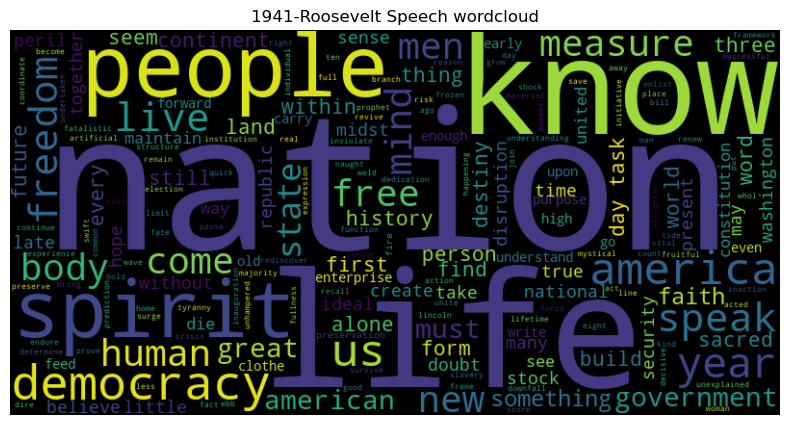

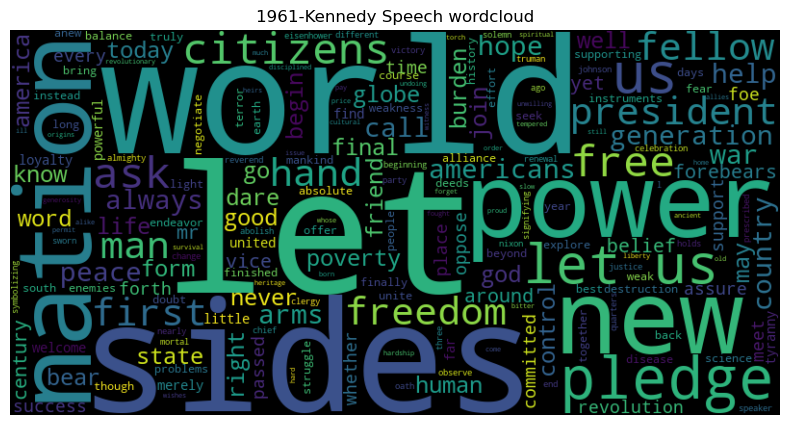

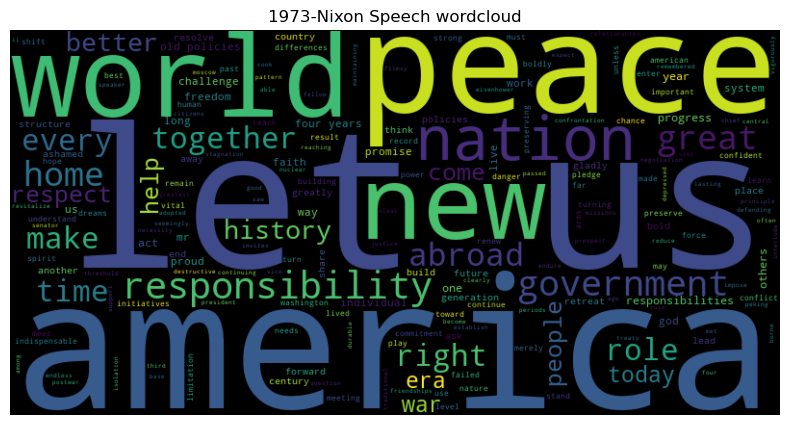

In [54]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(roosevelt_wordcloud, interpolation='bilinear')
plt.title('1941-Roosevelt Speech wordcloud')
plt.axis('off')
plt.show()
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(kennedy_wordcloud, interpolation='bilinear')
plt.title('1961-Kennedy Speech wordcloud')
plt.axis('off')
plt.show()
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(nixon_wordcloud, interpolation='bilinear')
plt.title('1973-Nixon Speech wordcloud')
plt.axis('off')
plt.show()

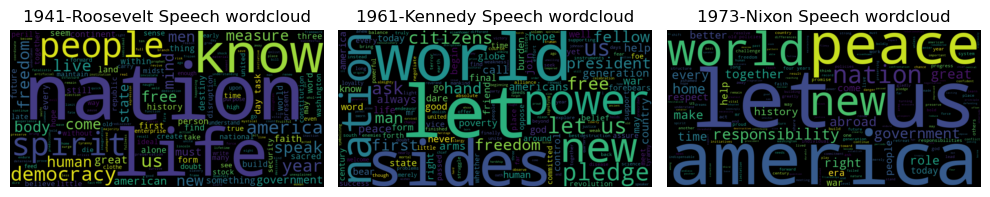

In [61]:
# Plot the word clouds
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(roosevelt_wordcloud, interpolation='bilinear')
plt.title('1941-Roosevelt Speech wordcloud')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(kennedy_wordcloud, interpolation='bilinear')
plt.title('1961-Kennedy Speech wordcloud')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(nixon_wordcloud, interpolation='bilinear')
plt.title('1973-Nixon Speech wordcloud')
plt.axis('off')

plt.tight_layout()
plt.show()

# Refelction Report

Please reflect on all that you learnt and fill this reflection: https://docs.google.com/forms/d/e/1FAIpQLSfqHHlmJyUkniiBiejtudIuRFk_TVCLe843wfX6Iu3QNRPmng/viewform?usp=sf_link

# Rough